# pill 2: About data

## 1. Exploring some data

In order to motivate this topic let us first explore a couple of datasets. The first one comes from Eurostat, I have downloaded for you data from Gross domestic expenditure on R&D (GERD) by source of funds (tsc00031), but you can take any other file. Let us look at the file:

In [ ]:
%load './files/tsc00031.tsv'

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px" ><b>QUESTION:</b> What do we find in this data? What about the data format? How is missing data represented? Are all data features numerical?</div>

Let us check another example. This time this is a file from a telecom, and our goal is to predict *churn*. Let us have a look at the data.

In [ ]:
%load './files/churn_small.csv'

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>QUESTION:</b> What do we find in this data? Look for categorical features? Are all features interesting? Do you believe the phone number to be predictive of churn?</div>

What we have found so far:

+ Heterogeneous data
+ Missing data
+ Categorical data
+ Large dimensionality
+ Outliers

What to do with all these pathologies?



Goals of this session:

+ Pandas exists
+ Feature extraction
+ Dealing with categorical data
    + One-hot encoding
    + Hashing trick
+ Dealing with missing data
+ Dealing with outliers
+ The curse of dimensionality

## 1. Pandas exists

pandas is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python.

pandas is well suited for:

+ Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
+ Ordered and unordered (not necessarily fixed-frequency) time series data.
+ Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels.

In [1]:
import pandas as pd


### DataFrames 
DataFrames are designed to store heterogeneous multivarite data, where for every index there are multiple fields or columns of data, often of different data type.

A `DataFrame` os a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored interally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

#### Reading tabular data

The ‘pandas’ Python library provides several operators, <code>read_csv(), read_table(), 
read_excel() ...</code> that allows you to access data ﬁles in tabular format on your computer as well as data stored in web repositories.

Reading in a data table is simply a matter of knowing the name (and location) of the data set.

In [3]:
from __future__ import division
import pandas as pd
import numpy as np

df = pd.read_csv('./files/churn.csv')


In [4]:
df.shape 

(3333, 21)

In [5]:
type(df)

pandas.core.frame.DataFrame

We can check the first or last rows of the data frame using `head` or  `tail`.

In [6]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
df.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


<div class="alert alert-warning">Let us describe a little bit what we are seeing.</div>

Data in CSV and databases are often organized in what is called *stacked* or *record* formats. In this case for each record we have 21 different attributes or columns.

In [8]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [9]:
col_names = df.columns.tolist()

print("Column names:")
print(col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


The values of the indexes can be retrieved using:

In [10]:
list(df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


We can return the values as a numpy array:

In [11]:
X = df.values

In [12]:
X

array([['KS', 128, 415, ..., 2.7, 1, 'False.'],
       ['OH', 107, 415, ..., 3.7, 1, 'False.'],
       ['NJ', 137, 415, ..., 3.29, 0, 'False.'],
       ...,
       ['RI', 28, 510, ..., 3.81, 2, 'False.'],
       ['CT', 184, 510, ..., 1.35, 2, 'False.'],
       ['TN', 74, 415, ..., 3.7, 0, 'False.']], dtype=object)

In [13]:
X[:,0]

array(['KS', 'OH', 'NJ', ..., 'RI', 'CT', 'TN'], dtype=object)

We can retrieve the values of a column indexing by its name

In [14]:
df['Area Code']

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: Area Code, Length: 3333, dtype: int64

If we slice then we are retrieving rows:

In [15]:
df[3:10]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


You can work the same way you do in numpy using `.ix`

In [16]:
df.loc[0:3,['Area Code', 'Phone']]

,Area Code,Phone
0,415,382-4657
1,415,371-7191
2,415,358-1921
3,408,375-9999


Pandas is useful for joining, slicing, selecting and cleaning data. There is much much more, but we will basically use numpy so, sufices to know the very basics.

## Example: Cleaning Eurostat

We have seen that the Eurostat file is a mixed file, we can read it according to the specific TAB defined format and the work out the rest.

In [17]:
%reset -f
import pandas as pd

df = pd.read_csv('./files/tsc00031.tsv', sep='\t',encoding="utf-8-sig")
df.head()

,"sectfund,unit,geo\time",2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,"ABR,PC_TOT,AT",20 e,19.4,18 e,18.4,17.9,16.4 e,16.8,16.1 e,16.9,15.7 e,16.6,15.2 ep
1,"ABR,PC_TOT,BA",:,:,:,:,:,:,:,:,:,48.7,53.9,:
2,"ABR,PC_TOT,BE",12.9,12.3,12.4,13.3,13,12.3,12.1,13.3,13,13,13.2,:
3,"ABR,PC_TOT,BG",5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,:
4,"ABR,PC_TOT,CH",:,5.2,:,:,:,6,:,:,:,12.1,:,:


We can split the cells using the commas, and create as many columns as elements according to the splitting.

In [18]:
cols = 'sectfund,unit,geo\\time'.split(',')
df[cols] = df['sectfund,unit,geo\\time'].str.split(',', expand=True)
df.head()

,"sectfund,unit,geo\time",2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,unit,geo\time
0,"ABR,PC_TOT,AT",20 e,19.4,18 e,18.4,17.9,16.4 e,16.8,16.1 e,16.9,15.7 e,16.6,15.2 ep,ABR,PC_TOT,AT
1,"ABR,PC_TOT,BA",:,:,:,:,:,:,:,:,:,48.7,53.9,:,ABR,PC_TOT,BA
2,"ABR,PC_TOT,BE",12.9,12.3,12.4,13.3,13,12.3,12.1,13.3,13,13,13.2,:,ABR,PC_TOT,BE
3,"ABR,PC_TOT,BG",5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,:,ABR,PC_TOT,BG
4,"ABR,PC_TOT,CH",:,5.2,:,:,:,6,:,:,:,12.1,:,:,ABR,PC_TOT,CH


And now we can drop the first column

In [19]:
df = df.drop(labels=['sectfund,unit,geo\\time'], axis=1)

df.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,unit,geo\time
0,20 e,19.4,18 e,18.4,17.9,16.4 e,16.8,16.1 e,16.9,15.7 e,16.6,15.2 ep,ABR,PC_TOT,AT
1,:,:,:,:,:,:,:,:,:,48.7,53.9,:,ABR,PC_TOT,BA
2,12.9,12.3,12.4,13.3,13,12.3,12.1,13.3,13,13,13.2,:,ABR,PC_TOT,BE
3,5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,:,ABR,PC_TOT,BG
4,:,5.2,:,:,:,6,:,:,:,12.1,:,:,ABR,PC_TOT,CH


<div class = "alert alert-success" style="border-radius:10px;border-width:3px">Let us try to clean a little bit this file.
<ol>
<li> Change all ':' for 'NaN'</li>
<li> Remove the letters in the numerical valued columns</li>
</ol>
</div>

In [20]:
import numpy as np
df = df.replace(': ',np.nan)
df.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,unit,geo\time
0,20 e,19.4,18 e,18.4,17.9,16.4 e,16.8,16.1 e,16.9,15.7 e,16.6,15.2 ep,ABR,PC_TOT,AT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7,53.9,NaN,ABR,PC_TOT,BA
2,12.9,12.3,12.4,13.3,13,12.3,12.1,13.3,13,13,13.2,NaN,ABR,PC_TOT,BE
3,5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,NaN,ABR,PC_TOT,BG
4,NaN,5.2,NaN,NaN,NaN,6,NaN,NaN,NaN,12.1,NaN,NaN,ABR,PC_TOT,CH


In [21]:
data_columns = df.columns

In [22]:
# Delete everything that i not a number or a point from the numerical columns

df[data_columns[:-3]]=df[data_columns[:-3]].replace(r'[^0-9\.]','', regex=True)

In [23]:
# Change to NAN elements without information

df[data_columns[:-3]]=df[data_columns[:-3]].replace(r'',np.nan, regex=True)

In [24]:
df[data_columns[:-3]]=df[data_columns[:-3]].astype(np.float)
df.head()

/tmp/ipykernel_53606/2257002222.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[data_columns[:-3]]=df[data_columns[:-3]].astype(np.float)


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,unit,geo\time
0,20.0,19.4,18.0,18.4,17.9,16.4,16.8,16.1,16.9,15.7,16.6,15.2,ABR,PC_TOT,AT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7,53.9,NaN,ABR,PC_TOT,BA
2,12.9,12.3,12.4,13.3,13.0,12.3,12.1,13.3,13.0,13.0,13.2,NaN,ABR,PC_TOT,BE
3,5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,NaN,ABR,PC_TOT,BG
4,NaN,5.2,NaN,NaN,NaN,6.0,NaN,NaN,NaN,12.1,NaN,NaN,ABR,PC_TOT,CH


In [25]:
df = df.drop(labels = ['unit'],axis=1)
df.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,geo\time
0,20.0,19.4,18.0,18.4,17.9,16.4,16.8,16.1,16.9,15.7,16.6,15.2,ABR,AT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7,53.9,NaN,ABR,BA
2,12.9,12.3,12.4,13.3,13.0,12.3,12.1,13.3,13.0,13.0,13.2,NaN,ABR,BE
3,5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,NaN,ABR,BG
4,NaN,5.2,NaN,NaN,NaN,6.0,NaN,NaN,NaN,12.1,NaN,NaN,ABR,CH


In [26]:
df.values

array([[20.0, 19.4, 18.0, ..., 15.2, 'ABR', 'AT'],
       [nan, nan, nan, ..., nan, 'ABR', 'BA'],
       [12.9, 12.3, 12.4, ..., nan, 'ABR', 'BE'],
       ...,
       [5.2, 4.8, 5.8, ..., 3.4, 'PNP', 'TR'],
       [4.7, 4.7, 4.7, ..., 4.6, 'PNP', 'UK'],
       [3.1, 3.0, 3.1, ..., nan, 'PNP', 'US']], dtype=object)

## 2. Handling Missing data

There are different casuistics for dealing with missing data. The following diagram shows some examples of how to deal with it. 

<img src='./files/missing_data.jpg' width=600px>

The process of replacing missing data with another value is called **inputing**.

There are basicaly three ways of dealing with missing data:

+ Deletion:

    + Completely remove data sample. This can be dangerous if the data set size is small. 
    + Pair-wise deletion. If we are making different analysis each involving different subsets of attributes, then for each specific analysis we could just remove the samples affected by missing data for that specific analysis instead of doing that for the complete data set first and then proceed with the analysis. In this sense we keep all possible data. This, however, does not necessary allow to fairly compare different analysis since they may involve different amount of data.
    
+ Single substitution:

    + Replace missing data with mean/mode/median. 
    + Create a *dummy variable*, a new variable, indicating the value is missing and inpute missing data to a single value such as mean/median.
    + Regression inputation. Use regression on available data to inpute the value.
    
+ Model-based methods
    + Multiple imputation: The idea is to sample the inputed value from a distribution (it can be the empirical distribution) and create a set of inputed datasets (each dataset is created by sampling the values independently). The analysis is done over all of them and results are aggregated.

In [27]:
df.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,sectfund,geo\time
0,20.0,19.4,18.0,18.4,17.9,16.4,16.8,16.1,16.9,15.7,16.6,15.2,ABR,AT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7,53.9,NaN,ABR,BA
2,12.9,12.3,12.4,13.3,13.0,12.3,12.1,13.3,13.0,13.0,13.2,NaN,ABR,BE
3,5.8,5.5,7.6,6.5,7.6,6.8,8.4,39.6,43.9,46.3,48.3,NaN,ABR,BG
4,NaN,5.2,NaN,NaN,NaN,6.0,NaN,NaN,NaN,12.1,NaN,NaN,ABR,CH


In [28]:
np.unique(df['sectfund'])

array(['ABR', 'BES', 'GOV', 'HES', 'PNP'], dtype=object)

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>QUESTION:</b> What should we do with this data?</div>

Let us check the amount of `NaN`, both column-wise and row-wise.

/tmp/ipykernel_53606/3559705020.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v=np.array(df.values[:,:-2],dtype=np.float)


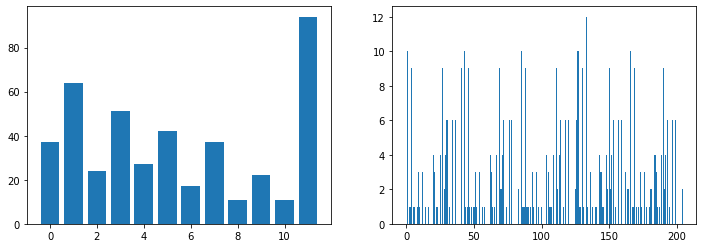

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
v=np.array(df.values[:,:-2],dtype=np.float)

fig = plt.figure()
sf1 = plt.subplot(1,2,1)
year_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=0)
plt.bar(np.array(range(year_nan.shape[0])),year_nan)
plt.subplot(1,2,2)
concept_nan = np.sum(np.where(np.isnan(v),1.,0.),axis=1)
plt.bar(np.array(range(concept_nan.shape[0])),concept_nan)

fig.set_size_inches((12,4))

<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>QUESTION:</b> What should we do with this data?</div>

Actually, we could work with this data set to understand EU country policies with respect to research. We could ask what are the countries that have a similar profile of expediture in research.

In order to answer this question we could work just with data from one year. Let us take 2012, for example.

In [30]:
df[['2012 ','sectfund','geo\\time']]

,2012,sectfund,geo\time
0,15.7,ABR,AT
1,48.7,ABR,BA
2,13.0,ABR,BE
3,46.3,ABR,BG
4,12.1,ABR,CH
...,...,...,...
200,0.1,PNP,SI
201,0.3,PNP,SK
202,3.4,PNP,TR
203,4.7,PNP,UK


We can represent each country according to the differnt kind of expeditures. To do this we will use pivoting.

In [31]:
df_2012 = df.pivot(index='geo\\time',columns='sectfund',values = '2012 ')
df_2012.head()

sectfund,ABR,BES,GOV,HES,PNP
geo\time,,,,,
AT,15.7,45.5,38.3,NaN,0.4
BA,48.7,17.1,26.8,7.4,0.1
BE,13.0,57.0,28.6,1.0,0.4
BG,46.3,20.8,31.5,0.2,1.3
CH,12.1,60.8,25.4,1.2,0.6


<div class = "alert alert-success" style ="border-radius:10px;border-width:3px"><b>EXERCISE:</b> We want to know what countries have more similar policies to each other. In order to do this, follow these steps:

<ul>
<li>Inpute missing values.</li>
<li>We will be using unsupervised learning techniques. In particular k-means. You can import `k-means` form the module `sklearn.cluster`. Supose that we want to find three different clusters. Train the clustering technique and report the countries more similar to the Spanish research policy.</li>
</ul>
</div>

In [32]:
df_2012.dropna(axis = 0, how = 'all', inplace=True) #remove countries where all data is missing
df_2012['HES'].fillna((df_2012['HES'].median()), inplace=True)
df_2012['PNP'].fillna((df_2012['PNP'].median()), inplace=True)

/tmp/ipykernel_53606/3748513675.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.argsort(clf).astype(np.int)


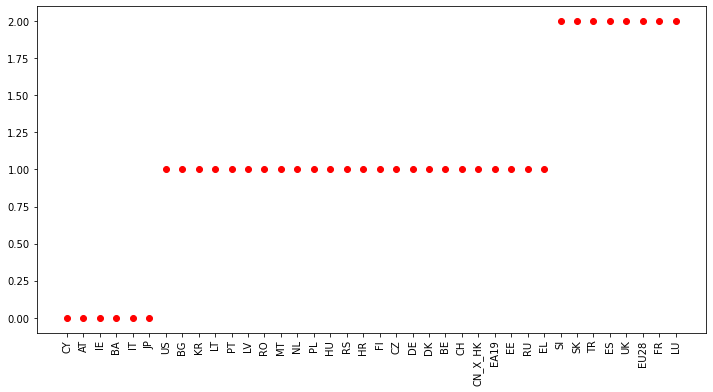

In [33]:
# Your code here

from sklearn.cluster import KMeans

#Imputation
df_inputed= df_2012

#Clustering
clf = KMeans(n_clusters=3)
clf = clf.fit(df_2012)
clf = clf.labels_

idx = np.argsort(clf).astype(np.int)
countries = np.array(df_inputed.index.tolist())

plt.plot(clf[idx],'ro')
plt.xticks(idx, countries, rotation='vertical')
plt.gcf().set_size_inches((12,6))

### 2.1 A toy problem

Consider the following two dimensional problem with missing values.

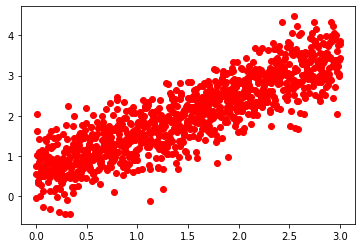

In [34]:
%reset -f 
import numpy as np

x = np.linspace(0,3,1000)
y = x + 0.5 + 0.5*np.random.normal(size=x.shape[0])

import matplotlib.pyplot as plt
plt.plot(x,y,'ro')

Let us apply a simple linear regressor (`linear_model`) from `sklearn`.

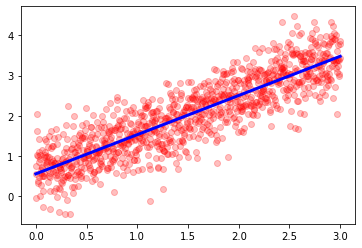

In [35]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf = clf.fit(x[:,np.newaxis],y[:,np.newaxis])
yhat=clf.predict(x[:,np.newaxis])

plt.plot(x,y,'ro',alpha=0.25)
plt.plot(x,yhat,'b-',linewidth=3)

Let us add some missing data.

In [36]:
y_missing_rand = y[:]
y_missing_rand = np.where(np.random.rand(x.shape[0])>0.5,np.nan,y)
print(y_missing_rand)

[-3.55212450e-02             nan  5.51894607e-01             nan
             nan             nan             nan             nan
  3.80601043e-01             nan             nan  1.11040973e+00
  4.76239920e-01  8.31769569e-03             nan             nan
             nan  2.76672621e-01  5.85128360e-01  6.96033450e-01
             nan             nan             nan             nan
             nan             nan  9.86203294e-01  5.14235902e-01
             nan             nan  1.10401985e+00             nan
             nan             nan             nan  8.55115141e-01
  9.94074398e-01  8.90528233e-01  8.22470763e-01  1.22622780e+00
             nan             nan  9.77684598e-01  5.14223725e-01
  1.49670188e+00 -3.07734123e-01             nan  4.84754589e-01
             nan  1.21068628e+00             nan  8.51143122e-01
  1.25779830e+00             nan             nan             nan
             nan  8.69640435e-01             nan             nan
             nan         

<div class = "alert alert-success" style ="border-radius:10px;border-width:3px"><b>EXERCISE:</b> Inpute missing values using the mean of the data and plot the data set.
</div>

In [37]:
#Your code here
y_inputed = np.copy(y_missing_rand)
y_inputed[np.isnan(y_inputed)] = np.nanmean(y_inputed)

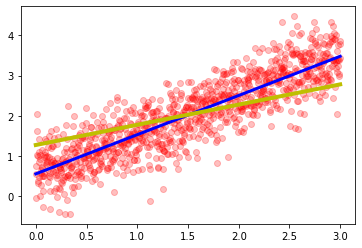

In [38]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf = clf.fit(x[:,np.newaxis],y_inputed[:,np.newaxis])
yhat_missing=clf.predict(x[:,np.newaxis])
plt.plot(x,y,'ro',alpha=0.25)
plt.plot(x,yhat,'b-',linewidth=3)
plt.plot(x,yhat_missing,'y-',linewidth=4)


<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>QUESTION:</b> What can we do to correct this issue?</div>

## 3. Some intuitions about the feature space and feature extraction.

Let us build our intuition about the feature extraction process. Cosider a classic problem of handwritten digits recognition. Let us load the data set.

In [39]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

Now, check the data just loaded.

In [40]:
#Check the data format.
X, y = digits.data, digits.target

print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


In [41]:
import numpy as np
print(np.min(X),np.max(X))

X = X/np.max(X)

0.0 16.0


<div class = "alert alert-info" style ="border-radius:10px;border-width:3px"><b>QUESTION:</b> What do the values of the attributes mean in this data set?</div>

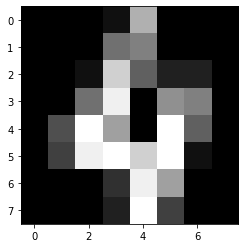

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X[4].reshape((8,8)),cmap='gray',interpolation='nearest')

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px">
**QUESTION:** Consider the following two problems:

<ul>
<li> We are asked to develop a product for analyzing the text in a website. The goal is to TAG the site according to its content. </li>
<li> We are asked to develop a product similar to Shazzam(tm). This is, recognize the name of a song given a small sample of the music.</li>
<p>
Discuss and describe a posible feature vector for this problem with your partner.
</div>

<div class = "alert alert-danger" style = "border-radius:10px">
**EXERCISE/QUIZ:**
Train a K-nearest neighbor classifier (module ``neighbors``, class ``KNeighborsClassifier``) with $K=10$ on the digits data and check the classification accuracy score on a test set. Use a train_test split of 50% of data for training and 50% for testing purposes and seed value ``random_state=42``. Report the classification accuracy.
</div>

In [50]:
# Your code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(10)

knn.fit(X_train, y_train)
y_test_hat = knn.predict(X_test)

acc = accuracy_score(y_test, y_test_hat)

print(f'Accuracy in test set: {acc}')

Accuracy in test set: 0.9688542825361512


### 3.1 Adding expert knowledge

<div class = "alert alert-success" style = "border-radius:10px">
**EXERCISE:**
Using the same settings as before try to enrich the training set. For exaple, we could use symmetry or amount of pixels. Train a K-nearest neighbor classifier (module ``neighbors``, class ``KNeighborsClassifier``) with $K=10$ on the digits data using the same settings as before using the training set enriched with new data and check the classification accuracy score.
</div>

In [ ]:
# Your code

### 3.2 Feature extraction: Adding interaction variables

Interaction variables try to make explicit the correlation of the attributes. In order to do so, we can just consider the product of pairs, triples, ... of atributes. Consider the following problem:

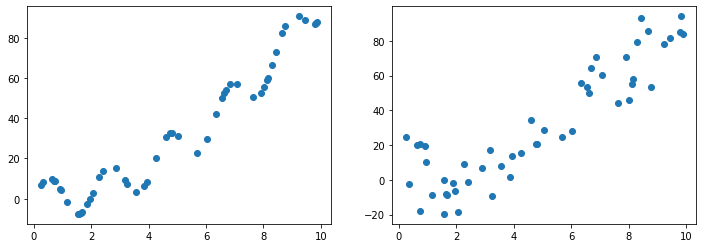

In [51]:
%matplotlib inline
%reset -f
import numpy as np
x_test = np.linspace(0,10,50)
x = 10*np.random.uniform(size=50)
y_original = x*x + 10*np.sin (3*x)
y_observed = y_original+12*np.random.normal(size=len(x))
y_test = x*x + 10*np.sin (3*x) + 12*np.random.normal(size=len(x))
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.scatter(x,y_original)
plt.subplot(122)
plt.scatter(x,y_observed)
plt.gcf().set_size_inches((12,4))


We want are forced to use a linear classifier to solve this problem. How can we model the non-linear behavior of this data set? We can, for example, add powers of the input features, i.e. $\{x,x^2,x^3,x^4\}$, and solve the linear regression problem. Let us show this:

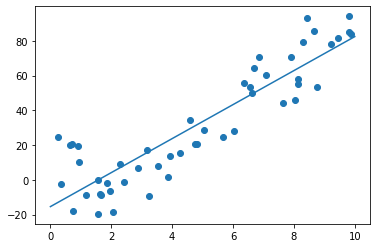

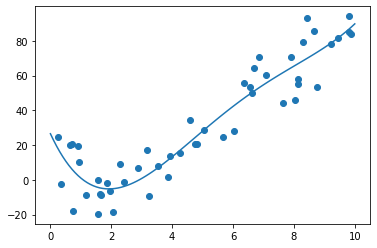

In [52]:
x_extended = np.c_[x,x*x,x*x*x,x*x*x*x]

from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(x.reshape(-1,1),y_observed)
xp = np.linspace(0,10,100)
yhat = clf.predict(xp.reshape(-1,1))

plt.figure()
plt.scatter(x,y_observed)
plt.plot(np.linspace(0,10,100),yhat)



clf = linear_model.LinearRegression()
clf.fit(x_extended,y_observed)
xp = np.linspace(0,10,100)
xp = np.c_[xp,xp*xp,xp*xp*xp,xp*xp*xp*xp]
yhat = clf.predict(xp)

plt.figure()
plt.scatter(x,y_observed)
plt.plot(np.linspace(0,10,100),yhat)



# 4. Another example.

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

The complete set of attributes is the following:

+ State: categorical, for the 50 states and the District of Columbia
+ Account length: integer-valued, how long an account has been active 
+ Area code: categorical
+ Phone number: customer ID
+ International Plan: binary feature, yes or no
+ VoiceMail Plan: binary feature, yes or no
+ Number of voice mail messages: integer-valued
+ Total day minutes: continuous, minutes customer used service during the day
+ Total day calls: integer-valued
+ Total day charge: continuous
+ Total evening minutes: continuous, minutes customer used service during the evening
+ Total evening calls: integer-valued
+ Total evening charge: continuous
+ Total night minutes: continuous, minutes customer used service during the night
+ Total night calls: integer-valued
+ Total night charge: continuous
+ Total international minutes: continuous, minutes customer used service to make international calls
+ Total international calls: integer-valued
+ Total international charge: continuous
+ Number of calls to customer service: integer-valued

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('./files/churn.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn_df[to_show].head(6)

<div class="alert alert-info" style = "border-radius:10px">
**QUESTION:** What shoulg we do with this dataset?
</div>

Getting some baseline value by removing all **weird** variables.

In [ ]:
data=churn_df.values

In [ ]:
print (col_names)

to_drop = np.array(['State','Phone',"Int'l Plan","VMail Plan",'Churn?'])

idx_to_drop = np.array([np.where(np.array(col_names) == tmp)[0] for tmp in to_drop])

fancy_index =  np.setdiff1d(np.arange(20),idx_to_drop)

data_removed = data[:,fancy_index]

print (data_removed)

In [ ]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone',"Int'l Plan","VMail Plan",'Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# Pull out features for future use
features = churn_feat_space.columns

X_removed = churn_feat_space.as_matrix().astype(np.float)

print ("Feature space holds %d observations and %d features" % X_removed.shape)
print ("Unique target labels:", np.unique(y))

In [ ]:
X_removed

In [ ]:
#Train a classifier using .fit()
from sklearn import neighbors
from sklearn import model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_removed,y,train_size=0.5,random_state=42)

knn.fit(X_train,y_train) 
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler


#Train a classifier using .fit()
from sklearn import neighbors
from sklearn import model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scaler = StandardScaler()

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_removed,y,train_size=0.5,random_state=42)

X_scaled = scaler.fit_transform(X_train)
knn.fit(X_scaled,y_train) 
X_test_scaled = scaler.transform(X_test)

print (knn.score(X_scaled,y_train))
print (knn.score(X_test_scaled,y_test))

### 4.1 Dealing with categorical data



### One-hot encoding aka Dummy variables

Dummy variables recode one feature into $K-1$ new features, where $K$ is the amount of values the original feature has. So for exemple, feature ``color`` has three values {red,blue,green}. We can replace this by $K-1 = 2$ new features, i.e. ``is_green?`` and ``is_blue?``. These new features have now two values, either $1$ if the question is true, or $0$ otherwise.


In [ ]:
import pandas as pd 

print ('There are ' +str(np.unique(churn_df["Int'l Plan"]).shape[0]) +' unique values for this feature.')
dummies = pd.get_dummies(churn_df["Int'l Plan"])
dummies_py = [1. if x=='yes' else  0. for x in churn_df["Int'l Plan"]]
dummies_numpy = np.where(churn_df["Int'l Plan"]=='yes',1.,0.)

print(len(dummies_py))
print(dummies_numpy.shape)

Oh! well pandas literally takes the word 'dummy' !!

We can add this feature back

In [ ]:
churn_df['IntYes'] = dummies_numpy

In [ ]:
churn_df.head()

and drop the international plan.

In [ ]:
churn_df.drop(["Int'l Plan"],axis=1)

<div class =  "alert alert-success" style= "border-radius:10px"> **EXERCISE**
Replace adequate variables with the corresponding dummies. This is `state`, `Int'l Plan`, and `VMail Plan`. Replace also `Churn?` if you have not alredy done that.
</div>

In [ ]:
#Your code

In [ ]:
#Train a classifier using .fit()
from sklearn import neighbors
from sklearn import model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_dummies,y,train_size=0.5,random_state=42)

knn.fit(X_train,y_train) 
print (knn.score(X_train,y_train))
print (knn.score(X_test,y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler


#Train a classifier using .fit()
from sklearn import neighbors
from sklearn import model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scaler = StandardScaler()

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_dummies,y,train_size=0.5,random_state=42)

X_scaled = scaler.fit_transform(X_train)
knn.fit(X_scaled,y_train) 
X_test_scaled = scaler.transform(X_test)

print (knn.score(X_scaled,y_train))
print (knn.score(X_test_scaled,y_test))

In [ ]:
print (X_test_scaled[3])

### 4.2 Numerical data preprocessing - normalization techniques

We have seen that numerical data in different ranges hinder the distance computation. Standarization solves this problem. Let us recap what standarization is about.

Standarization corresponds to apply the following transformation to each coordinate:

$$ \tilde{x} = \frac{x-\mu_x}{\sigma_x}$$

Let us code it.

In [ ]:

def myStandardScaler(X, mux=None, stx=None):
    if mux is None:
        mux = np.mean(X,axis = 0)
    if stx is None:
        stx = np.std(X,axis = 0)
    return (X - np.tile(mux,(X.shape[0],1)))/np.tile(stx,(X.shape[0],1)), mux, stx



Apply it now to the problem at hand considering the proper rules for training testing.

In [ ]:
from sklearn import neighbors
from sklearn import model_selection

knn = neighbors.KNeighborsClassifier(n_neighbors=1)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_dummies,y,train_size=0.5,random_state=42)

X_scaled,mux,stx = myStandardScaler(X_train)
knn.fit(X_scaled,y_train) 
X_test_scaled = myStandardScaler(X_test,mux=mux,stx = stx)[0]

print (knn.score(X_scaled,y_train))
print (knn.score(X_test_scaled,y_test))

Another way of comparing variables in different scale ranges is the following normalization:
    
$$\tilde{x} = \frac{x-\min(x)}{\max(x)-\min(x)}$$

Let us try this:

In [ ]:
def myMinMaxScaler(X, mi=None, mx=None):
    if mi is None:
        mi = np.min(X,axis = 0)
    if mx is None:
        mx = np.max(X,axis = 0)

    return (X - np.tile(mi,(X.shape[0],1)))/np.tile(mx-mi,(X.shape[0],1)), mi, mx



In [ ]:
from sklearn import neighbors
from sklearn import model_selection

knn = neighbors.KNeighborsClassifier(n_neighbors=1)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_dummies,y,train_size=0.5,random_state=42)

X_scaled,mi,mx = myMinMaxScaler(X_train)
knn.fit(X_scaled,y_train) 
X_test_scaled = myMinMaxScaler(X_test,mi=mi ,mx = mx)[0]

print (knn.score(X_scaled,y_train))
print (knn.score(X_test_scaled,y_test))

Observe though that all normalization techniques are heavily influenced by **outliers**. It is a good practice to detect outliers and potentially remove them.

### 4.3 Outliers

In order to really apply this technique we have to remove **outliers**. These are values that are far away from the rest. Outliers can be due to the inner dynamics of the measurement process (for example if it belongs to a heavy-tail distribution) or can be just an error. Let me just start saying that the notion of outliers is highly subjective. In words of Hawkins, 1980:

>"An outlier is an observation which deviates so much from the other
observations as to arouse suspicions that it was generated by a different
mechanism”


When we look for outliers we could consider different approaches:

+ Statistical description approaches: Consider that data is generated by some distribution. Infer the parameters of the distribution and score points accordingly. Outliers are those points with very small probability of belonging to the model.
+ Geometric considerations: Outliers are those points located at the external boundary of the data set. This can be modelled using the notion of *convex hulls*.
+ Distance based approaches: We can use the distance to the neighbors (we can use k-NN) to check if a point is an outlier. 


The most simple approach to outlier removal and normalization is to consider a percentile, $prc$, of the data as outliers and normalize according to those values. 

$$\tilde{x}=\frac{x-prc(x,\theta)}{prc(x,100-\theta)-prc(x,\theta)}$$

where $\theta$ is the percentile we consider as outliers.

In [ ]:
def myPrcScaler(X, mi=None, mx=None, theta=1.):
    if mi is None:
        mi = np.percentile(X,theta,axis=0)
    if mx is None:
        mx = np.percentile(X,100-theta,axis=0)

    return (X - np.tile(mi,(X.shape[0],1)))/(np.tile(mx-mi,(X.shape[0],1))+1e-16), mi, mx

In [ ]:
from sklearn import neighbors
from sklearn import model_selection

knn = neighbors.KNeighborsClassifier(n_neighbors=1)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_dummies,y,train_size=0.5,random_state=42)

X_scaled,mi,mx = myPrcScaler(X_train, theta=2.)
knn.fit(X_scaled,y_train) 
X_test_scaled = myPrcScaler(X_test,mi=mi ,mx = mx)[0]

print (knn.score(X_scaled,y_train))
print (knn.score(X_test_scaled,y_test))

### 4.4 Feature Hashing

Feature Hashing is like the encoding we saw before. However we use a hashing function that given the input category returns the value of the index where the one is located. This trick allows to 

Let's suppose we are interested in searching for a value $a$ in a long list. 

+ If it is an ordered list, there are really fast algorithms ($O(\mbox{log }n)$) to implement the search.
+ If it is not an ordered list, looking for a value needs the full reading of the list ($O(n)$).

Is it possible to do it better?

Let's suppose we have a list $L$ with an associated *magic function* that answer this kind of questions: 

> If $a$ would be stored in the list, in which position would be located?

The function will always return an index $i$. Then, if $a$ is present in $L[i]$, we have solved the problem. If not, we conclude that $a$ was not in the list.

**This kind of functions exists and they are called $hash$ functions.**

If we want to store a set of elements $\{ a_i \}$ in a list with this magic function, this function must have the following properties:

+ It must be **random**: it randomly distributes data among all possible indexes.
+ It must be **consistent**: the assignation rule must be constant and well defined.

When designing a hash function for a problem, we must take into account the data distribution.

If incoming data is represented by integer values with uniform distribution, we can use a random assignment rule, where the input parameter is data and the output parameter an index) and that's all!

+ If our data is $ a \in [0,N-1]$, and we have a list $L$ with N positions, the hash value can be $a$. If the list has n < N positions, the hash value can be $a \% n$.

If data is not uniformly distributed, we must design a function that generates uniformly distributed indexes from data values.

*Note*: When two different samples are assigned to the same position we have a **collision**. We can deal with this problem in easy ways.

### Hash functions.

When the data values are long (or variable-length) character strings—such as personal names, web page addresses, or mail messages—their distribution is usually very uneven, with complicated dependencies. 

For such data, it is prudent to use a hash function that depends on all characters of the string—and depends on each character in a different way.

In general, the scheme for hashing such data is to break the input into a sequence of small units (bits, bytes, words, etc.) and combine all the units $b[1], b[2], ..., b[m]$ sequentially.

In [ ]:
def StringHash(a, m=257, C=1024):
    
# m represents the estimated cardinality of the items set
# C represents a number that is larger that ord(c)
    hash=0
    for i in range(len(a)):
        hash = (hash * C + ord(a[i])) % m
    return hash

print (StringHash('hola'), StringHash('adios'))

There are more complex hashing techniques such as MurMur, SHA, etc.

The hashing trick in the end avoids the fact of having to build the complete set of features since given the raw input returns the column index where the one is located. The hashing trick can work as the former technique or we may parse/process more complex data similar to bag of words.



Let us check the intuition of what goes on when one applies the Hashing Trick. 

In [ ]:
dat = np.random.normal(size=300)
plt.figure()
plt.subplot(121)
plt.hist(dat)
plt.subplot(122)
ndat=[StringHash(str(item)) for item in dat]
plt.hist(ndat)
plt.gcf().set_size_inches((12,4))

Now lets check some value distances in both the original domain and the hashed domain.

In [ ]:
a = 1.0000000
b = 1.0000001
c = 109000.00

print ('Value of "a" : '+ str(a))
print ('Value of "b" : '+ str(b))
print ('Value of "c" : '+ str(c))
print ('Distance between a and b in the original space: ' + str(np.sqrt((b-a)*(b-a))))
print ('Distance between a and c in the original space: ' + str(np.sqrt((c-a)*(c-a))))

ha = StringHash(str(a))
hb = StringHash(str(b))
hc = StringHash(str(c))

print ('Distance between a and b in the hashed space: ' + str(np.sqrt((hb-ha)*(hb-ha))))
print ('Distance between a and c in the hashed space: ' + str(np.sqrt((hc-ha)*(hc-ha))))



#### Hashing trick intuitive idea

A text example: 
We can use a similar idea to the bag of words, i.e. to count the number of times each word appears in a text. In the bag of words scenario we have to define the set of words composing the dictionary beforehand. This implies checking all available words or define a very large feature space. By using the `hashing trick` we can define the dimensionality of the embedding beforehand without actually define the dictionary. This will come at the price of finding collisions.

Consider that we want to embed the following text using the hashing function $h$ with 6 bins (The representation vector is of dimension 6):

`My friend lives nearby.`

A sensible way of doing so is defining a partition of this text. The obvious partition is word-based. Thus we are going to compute the hashing function of each of the words composing the sentence. This is h(My), h(friend), h('lives'), h('nearby.').

Let us do so!

In [ ]:
sentence = 'My friend lives nearby.'

bins = [StringHash(item,m=6, C=8) for item in sentence.split(' ')]
print ('Hash values: ' + str(bins))

representation = np.zeros((6,1))
for idx in bins:
    representation[idx]+=1
    
print ('Representation vector: \n' + str(representation))

**ADVANTAGES**
+ The vectors will usually be very sparse. We can store them efficiently.
+ We can increase the complexity of the hashing function to prevent collisions. For example, using **bloom filters**. Or we could use another hashing function with two values +,- that encodes if we have to add 1 to that position or substract 1.
+ We don't need to prepare dictionaries or structures. This makes this approach real time and online friendly.
+ Distribution of the hashed data tends to the uniform distribution.

**DISADVANTAGES**
+ Metric notion in the original space disappears in the hashed space. There are metric sensitive hashing techniques such as **Locality Sensitive Hashing**.
+ One has to set in advance the dimensionality of the embedding space.



<div class = "alert alert-success" style = "border-radius:10px">
<b>EXERCISE:</b> 

We want to check if the variable `State` from the `churn.csv` data set conveys discriminant information. In order to do so we will encode this variable using one-hot encoding and feature hashing and check the prediction accuracy of on the `Churn?` target.
<p>

<b>TO DO:</b>
<ol>
<li>Create a data set with the one-hot encoding of the `State` variable.</li>
<li>Create a data set with the hashing encoding of the `State` variable.</li>
<li>Use a 3-Nearest neighbor classifier and report the average accuracy in both datasets in a test set of size 30% of the full data set; use `random_state=42`.</li>
</ol>

</div>

In [ ]:
#Your code

<div class = "alert alert-danger" style = "border-radius:10px">**QUIZ:** What of the following sentences is true,

<ol>
  <li> The feature is useful for the classifier using one-hot encoding.</li>
  <li> The feature is useful for the classifier using the hashing trick.</li>
</div>

## 5. Curse of dimensionality

<small>Based on the discussion of Pedro Domingo's "A Few Useful Things to Know About Machine Learning".</small>

So, does this means that we can add features at will? In principle yes, as long as they are informative. Let us check what happen when we add random data to our data set.


>The expression of *Curse of dimensionality* was coined by Bellman in 1961 to refer to the fact that many algo- rithms that work fine in low dimensions become intractable when the input is high-dimensional. But in machine learning it refers that generalizing correctly becomes exponentially harder as the dimensionality (number of features) of the examples grows, because a fixed-size training set covers a dwindling fraction of the input space. -- Pedro Domingo's "A Few Useful Things to Know About Machine Learning"

### 5.1 Nearest neighbor in front of increasing dimensions

Similarity-based reasoning that machine learning algorithms depend on (explicitly or implicitly) breaks down in high dimensions. Consider a nearest neighbor classifier with Hamming distance as the similarity measure, and suppose the class is just x1 ∧ x2. If there are no other features, this is an easy problem. But if there are 98 irrelevant features x3,...,x100, the noise from them completely swamps the signal in x1 and x2, and nearest neighbor effectively makes random predictions.

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X=data.data/16.
y=data.target

In [ ]:
import numpy as np

fake_dims = 1000
X_fake = np.random.randn(X.shape[0],fake_dims)

X_new = np.c_[X,X_fake]

#Train a classifier using .fit()
from sklearn import neighbors
from sklearn import model_selection
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

X_train,X_test,y_train,y_test = model_selection.train_test_split(X_new,y,train_size=0.5,random_state=42)

knn.fit(X_train,y_train) 
print ('Train accuracy ' + str(knn.score(X_train,y_train)) + '// Test accuracy ' + str(knn.score(X_test,y_test)))

### 5.2 The grid effect and the number of neighbors

Even more disturbing is that nearest neighbor still has a problem even if all 100 features are relevant! This is because in high dimensions all examples look alike. Suppose, for instance, that examples are laid out on a regular grid, and consider a test example xt. If the grid is d-dimensional, xt’s 2d nearest examples are all at the same distance from it. So as the dimensionality increases, more and more examples become nearest neighbors of xt, until the choice of nearest neighbor (and therefore of class) is effectively random.

### 5.3 Our intuition on Gaussian distributions and the hyper-orange peel.

This is only one instance of a more general problem with high dimensions: our intuitions, which come from a three- dimensional world, often do not apply in high-dimensional ones. In high dimensions, most of the mass of a multivariate Gaussian distribution is not near the mean, but in an increasingly distant “shell” around it; and most of the volume of a high-dimensional orange is in the skin, not the pulp. If a constant number of examples is distributed uniformly in a high-dimensional hypercube, beyond some dimensionality most examples are closer to a face of the hypercube than to their nearest neighbor. And if we approximate a hyper-sphere by inscribing it in a hypercube, in high dimensions almost all the volume of the hypercube is outside the hyper- sphere. This is bad news for machine learning, where shapes of one type are often approximated by shapes of another.


<div class = "alert alert-success">
**QUESTION:** Consider a $d$ dimensional Gaussian distribution with zero mean and identity covariance matrix. Do you think that drawing a sample at random will be close to the mean with high probability?
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d=100
N=1000000
X=np.random.multivariate_normal(np.zeros(d,),np.eye(d,),N)
d = np.linalg.norm(X,axis=1)
plt.hist(d,bins=30)
plt.xlabel('Distance to the mean')

**Considerations on large dimensional spaces.** CHECK MACKAY; MURPHY

### 5.4 Benefits of the curse of dimensionality

Building a classifier in two or three dimensions is easy; we
Test-Set Accuracy (%)
can find a reasonable frontier between examples of different classes just by visual inspection. (It’s even been said that if people could see in high dimensions machine learning would not be necessary.) But in high dimensions it’s hard to understand what is happening. This in turn makes it difficult to design a good classifier. Naively, one might think that gathering more features never hurts, since at worst they provide no new information about the class. But in fact their benefits may be outweighed by the curse of dimensionality.
Fortunately, there is an effect that partly counteracts the curse, which might be called the “blessing of non-uniformity.” In most applications examples are not spread uniformly throughout the instance space, but are concentrated on or near a lower-dimensional manifold. For example, k-nearest neighbor works quite well for handwritten digit recognition even though images of digits have one dimension per pixel, because the space of digit images is much smaller than the space of all possible images. Learners can implicitly take advantage of this lower effective dimension, or algorithms for explicitly reducing the dimensionality can be used.